# Capstone Project — The Battle of Neighbourhoods

### Introduction
<p>New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.</p>
 <p>New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.</p> 
    <p>The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies.
    Over last decades it is continuously grow because of the city’s important role in government and commercial business.
    
</p>
With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc.

So as part of this project , we will list and visualise all major parts of New Delhi City .
   </p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in New Delhi City for Chinese Cuisine ? 
- Which areas have large number of Chinese Resturant Market ? 
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer Chinese Cuisine ?
- What places are have best restaurant in New Delhi?

### Data
For this project we need the following data :
<ul>
<li> New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
     </ul>
<li> Nearby places in each locality of new delhi city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the new delhi city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

## Read the zomato resturant data from csv file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nidhi-hub/coursera_capstone/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [4]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes','Average Cost for two','Has Online delivery', 'Rating color','Rating text']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [6]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Average Cost for two Has Online delivery Rating color Rating text  
1                   350                 Yes       Orange     Average  
2                  1500                 Yes       Orange     Average  
3                   500                  No       Orange     Average  
4                   500                 Yes       Orange     Average  
5                   400                  No       Orange     Average

### created map to show the restaurant cluters 

In [7]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [8]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Average Cost for two Has Online delivery Rating color Rating text  Cluster  
1                   350                 Yes       Orange     Average        0  
2                  1500                 Yes       Orange     Average        0  
3                   500                  No       Orange     Average        0  
4                   500                 Yes       Orange     Average        0  
5                   400                  No       Orange     Average        0

## What places are have best restaurant in New Delhi?

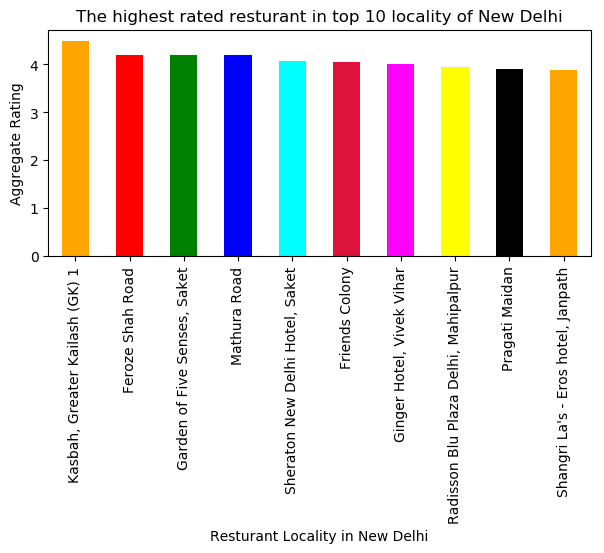

In [66]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 12)
print(viridis)
plt.figure(figsize=(7,3), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis
colors = cm.RdYlGn
#giving a bar plot
color=['orange', 'red', 'green', 'blue', 'cyan','crimson','magenta','yellow', 'black']

df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar',color=color)

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


The best restarants are available in <b>Kesbah, Greater Kailash area.</b>

## what places are have worst restaurants in New Delhi?

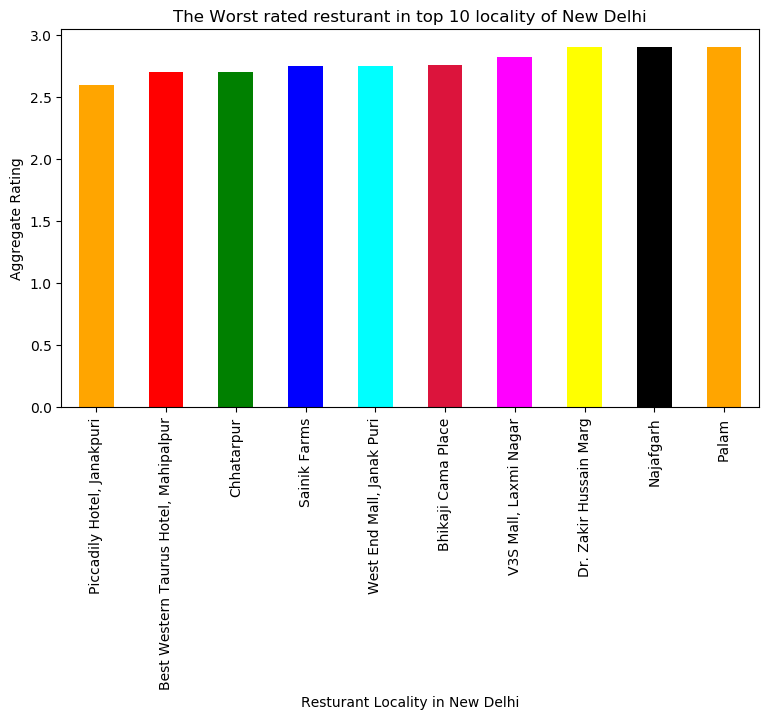

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

# Specify this list of colors as the `color` option to `plot`.
color=['orange', 'red', 'green', 'blue', 'cyan','crimson','magenta','yellow', 'black']
df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar',color=color)

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in <b>Piccadily Hotel, Janakpuri.</b>

## Which place are suitable for edible person in New Delhi city?

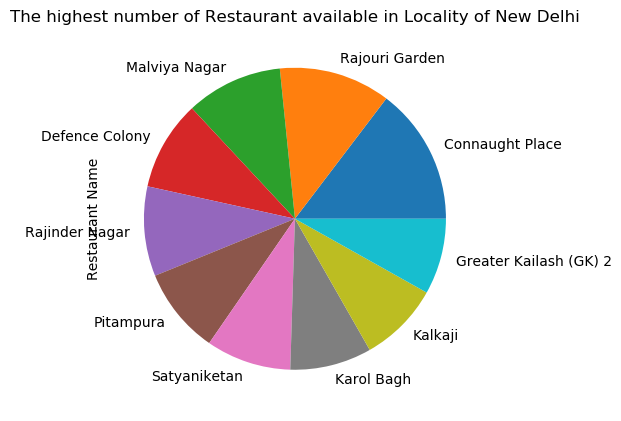

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
color=['orange', 'red', 'green', 'blue', 'cyan','crimson','magenta','yellow', 'black']
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='pie')

#plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
#plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>Connaught Place</b> is the best places for edible person to stay there.

## Which place are not suitable for edible person in New Delhi city?

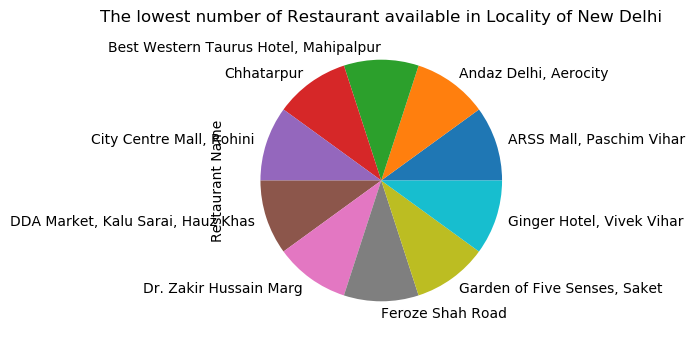

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis
color=['orange', 'red', 'green', 'blue', 'cyan','crimson','magenta','yellow', 'black']
#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='pie')

#plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
#plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>Paschim Vihar</b> is the worst places for edible person to stay there.

## What are the best places for continental restaurant in New Delhi city

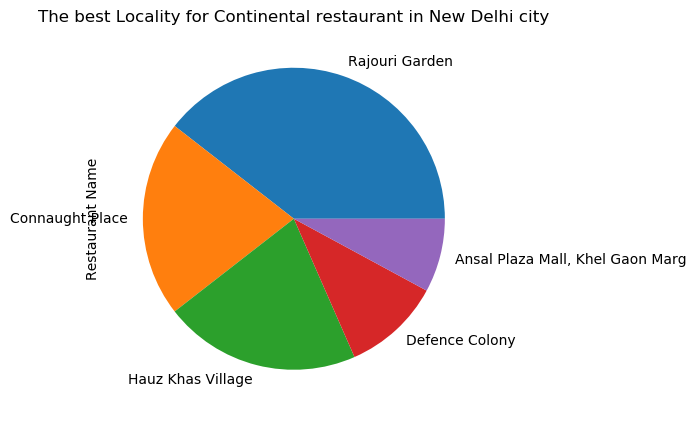

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for Continental restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Continental')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='pie')

#plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
#plt.ylabel('Number of Continental Restaurant')

#displays the plot
plt.show()

<b>Rajouri Garden</b> is the best place for Continental restaurant.

## which places are the best continental resturants in New Delhi?  

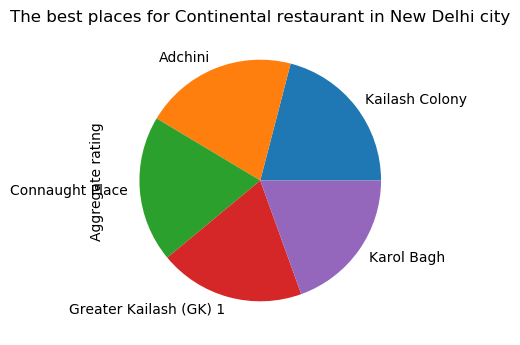

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4), dpi = 100)
# title
plt.title('The best places for Continental restaurant in New Delhi city')
#On x-axis
color=['orange', 'red', 'green', 'blue', 'cyan','crimson']
#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Continental')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='pie')

#plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
#plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<b> Kailash Colony</b> has best Continental resturants.

### Data transformation
Based on Locality grouping the data

In [15]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
df_price=df_Res.groupby('Locality')["Average Cost for two"].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_V, on ='Locality').merge(df_price,on ='Locality')

In [16]:
df_final = df_final[df_final['Aggregate rating'] != 0]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','No_of_Votes','Average price for two']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  No_of_Votes  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000          117   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308         1560   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000          434   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000           59   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333          126   

   Average price for two  
0             500.000000  
1             823.076923  
2             775.000000  
3             725.000000  
4             900.000000

In [17]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version

In [18]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'LCO2HYMMQ12SHZQD4UOMMOW04SDU04AX4CEZGZ0QUAYMC1R2' # Foursquare ID
CLIENT_SECRET = 'FJ1YYHQIKOGG415ENQMBMAAOFVPLQOW2T4FKJHVSIFMTMZ1B' # Foursquare Secret
VERSION = '20200621' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LCO2HYMMQ12SHZQD4UOMMOW04SDU04AX4CEZGZ0QUAYMC1R2
CLIENT_SECRET:FJ1YYHQIKOGG415ENQMBMAAOFVPLQOW2T4FKJHVSIFMTMZ1B


## create a function to repeat the same process to all the Locality in New Delhi

In [19]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        

        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [20]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [21]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [22]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         6   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   5   
Aggarwal City Plaza, Rohini                                     6   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     5   
Andaz Delhi, Aerocity                                          28   
Ansal Plaza Mall, Khel Gaon Marg                                4   
Asaf Ali Road                                                   6   
Ashok Vihar Phase 1                                             7   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             5   
Barakhamba Road                                                15   
Basant Lok Market, Vasant Vihar                                28   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                          11   
Bhikaji Cama Place                                             12   
Chanakyapuri                                                    6   
Chander Nagar                                                   3   
Chandni Chowk                                                  18   
Chawri Bazar                                                    6   
Chhatarpur                                                      5   
Chittaranjan Park                                               4   
City Centre Mall, Rohini                                       10   
City Square Mall, Rajouri Garden                               24   
Civil Lines                                                     5   
...                                                           ...   
The Lalit New Delhi, Barakhamba Road                            6   
The Leela Ambience Convention Hotel                             6   
The Leela Palace, Chanakyapuri                                 12   
The Lodhi, Lodhi Road                                          14   
The Park, Connaught Place                                      26   
The Suryaa New Delhi, New Friends Colony                       22   
The Taj Mahal Hotel, Mansingh Road                              6   
The Taj Palace Hotel, Chanakyapuri                             34   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 13   
Tilak Nagar                                                     4   
Tughlakabad Institutional Area                                  6   
Uday Park                                                       6   
Unity One Mall, Janakpuri                                       5   
Uttam Nagar                                                     3   
V3S Mall, Laxmi Nagar                                          12   
Vasant Kunj                                                     7   
Vasant Square Mall, Vasant Kunj                                 9   
Vasant Vihar                                                   29   
Vasundhara Enclave                                              1   
Vijay Nagar                                                    12   
Vikas Marg                                                      4   
Vikaspuri                                                       3   
Vivek Vihar                                                     4   
West End Mall, Janak Puri                                      12   
West Gate Mall, Rajouri Garden                

In [23]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 207 uniques categories.


In [24]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 208 columns]

In [25]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').sum().reset_index()
New_Delhi_grouped

Locality  ATM  Accessories Store  \
0                          ARSS Mall, Paschim Vihar    1                  0   
1                                           Adchini    0                  0   
2                     Aditya Mega Mall, Karkardooma    0                  0   
3                                          Aerocity    0                  0   
4                     Aggarwal City Mall, Pitampura    0                  0   
5                       Aggarwal City Plaza, Rohini    0                  0   
6                                         Alaknanda    0                  0   
7                        Ambience Mall, Vasant Kunj    0                  0   
8                                         Anand Lok    0                  0   
9                                       Anand Vihar    0                  0   
10                            Andaz Delhi, Aerocity    0                  0   
11                 Ansal Plaza Mall, Khel Gaon Marg    0                  0   
12                                    Asaf Ali Road    0                  0   
13                              Ashok Vihar Phase 1    0                  0   
14                              Ashok Vihar Phase 2    0                  0   
15                              Ashok Vihar Phase 3    0                  0   
16                                  Barakhamba Road    0                  0   
17                  Basant Lok Market, Vasant Vihar    0                  0   
18                    Bellagio, Ashok Vihar Phase 2    0                  0   
19            Best Western Taurus Hotel, Mahipalpur    0                  1   
20                               Bhikaji Cama Place    0                  0   
21                                     Chanakyapuri    0                  0   
22                                    Chander Nagar    0                  0   
23                                    Chandni Chowk    0                  0   
24                                     Chawri Bazar    0                  0   
25                                       Chhatarpur    0                  0   
26                                Chittaranjan Park    0                  0   
27                         City Centre Mall, Rohini    0                  0   
28                 City Square Mall, Rajouri Garden    0                  0   
29                                      Civil Lines    0                  0   
..                                              ...  ...                ...   
208            The Lalit New Delhi, Barakhamba Road    0                  0   
209             The Leela Ambience Convention Hotel    0                  0   
210                  The Leela Palace, Chanakyapuri    0                  0   
211                           The Lodhi, Lodhi Road    0                  0   
212                       The Park, Connaught Place    0                  0   
213        The Suryaa New Delhi, New Friends Colony    0                  0   
214              The Taj Mahal Hotel, Mansingh Road    0                  0   
215              The Taj Palace Hotel, Chanakyapuri    0                  0   
216                             The Uppal, Aerocity    0                  0   
217  The Village Restaurant Complex, Khel Gaon Marg    0                  0   
218                                     Tilak Nagar    0                  0   
219                  Tughlakabad Institutional Area    0                  0   
220                                       Uday Park    0                  0   
221                       Unity One Mall, Janakpuri    0                  0   
222                                     Uttam Nagar    1                  0   
223                           V3S Mall, Laxmi Nagar    0                  0   
224                                     Vasant Kunj    0                  0   
225                 Vasant Square Mall, Vasant Kunj    0                  0   
226                                    Vasant Vihar    0                  0   
227           

In [26]:
New_Delhi_grouped.shape

(238, 208)

In [27]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant   2.0
1                             ATM   1.0
2                     Coffee Shop   1.0
3                  Sandwich Place   1.0
4  Multicuisine Indian Restaurant   1.0


----Adchini----
               venue  freq
0               Café   2.0
1  Indian Restaurant   2.0
2                Pub   1.0
3         Restaurant   1.0
4                ATM   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   2.0
1      Shopping Mall   2.0
2          Multiplex   2.0
3  Indian Restaurant   2.0
4              Hotel   1.0


----Aerocity----
                  venue  freq
0                 Hotel   2.0
1  Fast Food Restaurant   1.0
2        Airport Lounge   1.0
3   Rental Car Location   1.0
4      Airport Terminal   1.0


----Aggarwal City Mall, Pitampura----
                venue  freq
0    Department Store   1.0
1   Indian Restaurant   1.0
2    Business Service 

In [28]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality    1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar        Indian Restaurant   
1                                           Adchini        Indian Restaurant   
2                     Aditya Mega Mall, Karkardooma        Indian Restaurant   
3                                          Aerocity                    Hotel   
4                     Aggarwal City Mall, Pitampura         Department Store   
5                       Aggarwal City Plaza, Rohini     Gym / Fitness Center   
6                                         Alaknanda  New American Restaurant   
7                        Ambience Mall, Vasant Kunj              Coffee Shop   
8                                         Anand Lok                     Café   
9                                       Anand Vihar                     Café   
10                            Andaz Delhi, Aerocity                    Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg    Performing Arts Venue   
12                                    Asaf Ali Road                   Hostel   
13                              Ashok Vihar Phase 1              Snack Place   
14                              Ashok Vihar Phase 2        Indian Restaurant   
15                              Ashok Vihar Phase 3     Gym / Fitness Center   
16                                  Barakhamba Road        Indian Restaurant   
17                  Basant Lok Market, Vasant Vihar                     Café   
18                    Bellagio, Ashok Vihar Phase 2        Indian Restaurant   
19            Best Western Taurus Hotel, Mahipalpur                    Hotel   
20                               Bhikaji Cama Place                    Hotel   
21                                     Chanakyapuri                     Park   
22                                    Chander Nagar              Pizza Place   
23                                    Chandni Chowk        Indian Restaurant   
24                                     Chawri Bazar        Indian Restaurant   
25                                       Chhatarpur        Indian Restaurant   
26                                Chittaranjan Park                   Market   
27                         City Centre Mall, Rohini            Shopping Mall   
28                 City Square Mall, Rajouri Garden     Fast Food Restaurant   
29                                      Civil Lines              Coffee Shop   
..                                              ...                      ...   
208            The Lalit New Delhi, Barakhamba Road        Indian Restaurant   
209             The Leela Ambience Convention Hotel                     Café   
210                  The Leela Palace, Chanakyapuri        Indian Restaurant   
211                           The Lodhi, Lodhi Road       Chinese Restaurant   
212                       The Park, Connaught Place                    Hotel   
213        The Suryaa New Delhi, New Friends Colony                     Café   
214              The Taj Mahal Hotel, Mansingh Road        Indian Restaurant   
215              The Taj Palace Hotel, Chanakyapuri                    Hotel   
216                             The Uppal, Aerocity                    Hotel   
217  The Village Restaurant Complex, Khel Gaon Marg                      Bar   
218                                     Tilak Nagar     Fast Food Restaurant   
219                  Tughlakabad Institutional Area               Restaurant   
220                                       Uday Park                     Café   
221                       Unity One Mall, Janakpuri              Pizza Place   
222                                     Uttam Nagar                      ATM   
223                           V3S Mall, Laxmi Nagar                Gift Shop   
224                                     Vasant Kunj     Fast Food Restaurant   
225                 Vasant Square Mall, Vasant Kunj                     Café   
226                                    Vasa

In [30]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [31]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  No_of_Votes  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000          117   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308         1560   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000          434   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000           59   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333          126   

   Average price for two  Cluster Labels 1st Most Common Venue  \
0             500.000000               0     Indian Restaurant   
1             823.076923               0     Indian Restaurant   
2             775.000000               0     Indian Restaurant   
3             725.000000               0                 Hotel   
4             900.000000               0      Department Store   

  2nd Most Common Venue 3rd Most Common Venue           4th Most Common Venue  \
0                   ATM           Pizza Place  Multicuisine Indian Restaurant   
1                  Café                   Pub                      Restaurant   
2           Pizza Place             Multiplex                   Shopping Mall   
3        Airport Lounge           Coffee Shop                Airport Terminal   
4     Indian Restaurant           Pizza Place              Chinese Restaurant   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Coffee Shop    Chinese Restaurant        Sandwich Place   
1    Dim Sum Restaurant                 Diner            Food Truck   
2                 Hotel                  Café          Dessert Shop   
3  Fast Food Restaurant   Rental Car Location         Women's Store   
4      Business Service    Falafel Restaurant     French Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Market    Falafel Restaurant             Food Court  
1            Food Court     Food & Drink Shop                   Food  
2  Fast Food Restaurant            Food Truck             Food Court  
3    Falafel Restaurant     French Restaurant             Food Truck  
4            Food Truck            Food Court      Food & Drink Shop

In [32]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [33]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  No_of_Votes  \
0                          ARSS Mall, Paschim Vihar    3.100000          117   
1                                           Adchini    3.292308         1560   
2                     Aditya Mega Mall, Karkardooma    3.275000          434   
3                                          Aerocity    3.200000           59   
4                     Aggarwal City Mall, Pitampura    3.033333          126   
5                       Aggarwal City Plaza, Rohini    3.040000          594   
6                                         Alaknanda    3.117391         1012   
8                                         Anand Lok    3.800000         2411   
9                                       Anand Vihar    3.281481         1309   
11                 Ansal Plaza Mall, Khel Gaon Marg    3.750000          875   
12                                    Asaf Ali Road    3.050000           17   
13                              Ashok Vihar Phase 1    3.090000          971   
14                              Ashok Vihar Phase 2    3.378571         2343   
15                              Ashok Vihar Phase 3    3.390909          485   
16                                  Barakhamba Road    3.208333         1779   
18                    Bellagio, Ashok Vihar Phase 2    3.300000          415   
20                               Bhikaji Cama Place    2.755556          339   
21                                     Chanakyapuri    3.085714         1617   
22                                    Chander Nagar    3.085714           80   
24                                     Chawri Bazar    3.800000         1410   
25                                       Chhatarpur    2.700000           23   
26                                Chittaranjan Park    3.130303         2578   
27                         City Centre Mall, Rohini    3.400000          134   
29                                      Civil Lines    3.300000          769   
32                     Crescent Square Mall, Rohini    3.150000          494   
33                    Cross River Mall, Karkardooma    3.320000          636   
34                       Crowne Plaza Hotel, Rohini    3.600000          119   
37                DDA Market, Kalu Sarai, Hauz Khas    3.000000            4   
38              DLF City Centre Mall, Shalimar Bagh    3.225000          168   
42                 DLF South Square, Sarojini Nagar    2.983333          542   
..                                              ...         ...          ...   
190                             Shanti Niketan Marg    3.100000          114   
197             Star City Mall, Mayur Vihar Phase 1    2.985714          560   
198                                   Subhash Nagar    3.023529          185   
199                                    Sunder Nagar    3.700000          964   
201                        TDI Mall, Rajouri Garden    3.500000          479   
203                        Taj Vivanta, Khan Market    3.633333         1018   
204                         The Ashok, Chanakyapuri    3.533333          902   
208              The India Mall, New Friends Colony    2.971429          486   
209            The Lalit New Delhi, Barakhamba Road    3.537500         1666   
210             The Leela Ambience Convention Hotel    3.775000          460   
211                  The Leela Palace, Chanakyapuri    3.780000          709   
214        The Suryaa New Delhi, New Friends Colony    3.425000          246   
216              The Taj Palace Hotel, Chanakyapuri    3.800000          287   
217                             The Uppal, Aerocity    3.066667           37   
218  The Village Restaurant Complex, Khel Gaon Marg    3.833333         1133   
219                                     Tilak Nagar    3.048148          290   
220                  Tughlakabad Institutional Area    3.700000          281   
221                                       Uday Park    3.733333          615   
222                       Unity One Mall, J

In [34]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  No_of_Votes  \
19   Best Western Taurus Hotel, Mahipalpur    2.700000            9   
35       Crowne Plaza, Mayur Vihar Phase 1    3.350000          127   
43                               Daryaganj    3.287500         2570   
70                Holiday Inn, Mayur Vihar    3.550000          302   
74          Hotel The Royal Plaza, Janpath    3.416667          475   
78                ITC Maurya, Chanakyapuri    3.733333         3121   
111                   Le Meridien, Janpath    3.666667          725   
119                             Mahipalpur    2.960000          259   
188                          Shalimar Bagh    3.168182         1668   
196                Spark Mall, Kamla Nagar    3.320000          286   
206       The Grand New Delhi, Vasant Kunj    3.450000          242   
212                  The Lodhi, Lodhi Road    3.350000          189   
215     The Taj Mahal Hotel, Mansingh Road    3.785714         1976   

     Average price for two  Cluster Labels 1st Most Common Venue  \
19             1500.000000               1                 Hotel   
35             2500.000000               1                 Hotel   
43              470.833333               1     Indian Restaurant   
70             1900.000000               1                 Hotel   
74             2750.000000               1                 Hotel   
78             3533.333333               1                 Hotel   
111            3500.000000               1                 Hotel   
119             578.000000               1                 Hotel   
188             354.545455               1     Convenience Store   
196             530.000000               1     Indian Restaurant   
206            2925.000000               1           Coffee Shop   
212            1700.000000               1    Chinese Restaurant   
215            4671.428571               1     Indian Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
19      Indian Restaurant     Accessories Store    Italian Restaurant   
35      Indian Restaurant   American Restaurant           Pizza Place   
43                  Hotel            Restaurant                Hostel   
70             Restaurant      Department Store   American Restaurant   
74      Indian Restaurant    Chinese Restaurant                   Spa   
78      Indian Restaurant                  Café    Chinese Restaurant   
111     Indian Restaurant            Restaurant                   Spa   
119            Shoe Store     Indian Restaurant                   Spa   
188           Pizza Place           Coffee Shop                 Hotel   
196  Fast Food Restaurant        Breakfast Spot            Donut Shop   
206  Fast Food Restaurant        Clothing Store      Department Store   
212     Indian Restaurant        Shop & Service           Pizza Place   
215            Restaurant   Japanese Restaurant             Hotel Bar   

    5th Most Common Venue     6th Most Common Venue 7th Most Common Venue  \
19             Shoe Store                 Hotel Bar       Bed & Breakfast   
35             Restaurant          Asian Restaurant          Liquor Store   
43                   Road          Asian Restaurant         Movie Theater   
70                 Bakery                    Market      Asian Restaurant   
74     Italian Restaurant                Restaurant          Cocktail Bar   
78             Hotel Pool  Mediterranean Restaurant                   Bar   
111                   Bar        Chinese Restaurant          Cocktail Bar   
119       Thai Restaurant           Bed & Breakfast                 Plaza   
188                Bakery      Gym / Fitness Center    Falafel Restaurant   
196           Pizza Place               Coffee Shop    Chinese Restaurant   
206    Chinese Restaurant       Fried Chicken Joint             Bookstore   
212             BBQ Joint                       Spa    Light Rail Station   
215                  Pool        Chinese Restaurant           

In [35]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  No_of_Votes  \
31                Connaught Place    3.779832       128107   
40          DLF Place Mall, Saket    3.700000         5920   
117  MGF Metropolitan Mall, Saket    3.640000         1945   
183             Sector 15, Dwarka    3.100000            9   
191                  Sheikh Sarai    3.100000           14   
194             South Extension 2    3.303125         2411   

     Average price for two  Cluster Labels 1st Most Common Venue  \
31             1197.058824               2     Indian Restaurant   
40              937.500000               2     Indian Restaurant   
117            1620.000000               2     Indian Restaurant   
183             300.000000               2         Train Station   
191             350.000000               2       Thai Restaurant   
194             618.750000               2           Coffee Shop   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
31                   Café                   Bar    Chinese Restaurant   
40                 Lounge        Clothing Store    Chinese Restaurant   
117                Lounge        Clothing Store    Chinese Restaurant   
183    Light Rail Station         Women's Store    Falafel Restaurant   
191                  Café            Whisky Bar    Italian Restaurant   
194        Clothing Store                Market     Indian Restaurant   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
31            Coffee Shop             BBQ Joint                Lounge   
40                   Café                   Bar            Restaurant   
117                   Bar                  Café         Shopping Mall   
183   Fried Chicken Joint     French Restaurant            Food Truck   
191         Historic Site                Market            Food Truck   
194           Pizza Place   American Restaurant  Fast Food Restaurant   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
31                    Pub         Deli / Bodega              Gastropub  
40          Shopping Mall                 Hotel              Multiplex  
117             Multiplex            Donut Shop             Restaurant  
183            Food Court     Food & Drink Shop                   Food  
191            Food Court     Food & Drink Shop                   Food  
194    Chinese Restaurant   Sporting Goods Shop            Men's Store

In [36]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  No_of_Votes  \
10            Andaz Delhi, Aerocity    3.000000            4   
69            Holiday Inn, Aerocity    3.300000           30   
83            JW Marriott New Delhi    3.300000           15   
112    Lemon Tree Premier, Aerocity    3.500000           26   
149                       Paharganj    2.996552         2850   
162      Premier Inn, Shalimar Bagh    3.050000           50   
173                          Rohini    3.352083         4514   
235  West Gate Mall, Rajouri Garden    3.500000          178   
237           Worldmark 1, Aerocity    3.220000           77   

     Average price for two  Cluster Labels 1st Most Common Venue  \
10             1500.000000               3                 Hotel   
69             1000.000000               3                 Hotel   
83             4500.000000               3                 Hotel   
112            1000.000000               3                 Hotel   
149             571.551724               3                 Hotel   
162            2100.000000               3                  Café   
173             494.791667               3     Indian Restaurant   
235            1500.000000               3                  Café   
237             570.000000               3                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
10                    Spa           Coffee Shop            Restaurant   
69                    Spa           Coffee Shop            Restaurant   
83                    Spa           Coffee Shop            Restaurant   
112                   Spa           Coffee Shop            Restaurant   
149     Indian Restaurant            Restaurant                  Café   
162                 Hotel           Event Space     French Restaurant   
173      Department Store    Light Rail Station  Fast Food Restaurant   
235  Fast Food Restaurant            Restaurant         Shopping Mall   
237                   Spa           Coffee Shop            Restaurant   

    5th Most Common Venue      6th Most Common Venue 7th Most Common Venue  \
10             Hotel Pool           Asian Restaurant          Noodle House   
69        Bed & Breakfast                  Hotel Bar      Asian Restaurant   
83              Hotel Bar           Asian Restaurant            Hotel Pool   
112             Hotel Bar           Asian Restaurant            Hotel Pool   
149                Hostel  Indian Chinese Restaurant        Sandwich Place   
162            Food Truck                 Food Court     Food & Drink Shop   
173         Women's Store         Falafel Restaurant   Fried Chicken Joint   
235     Indian Restaurant                Snack Place            Hookah Bar   
237       Bed & Breakfast                  Hotel Bar      Asian Restaurant   

    8th Most Common Venue           9th Most Common Venue  \
10     Punjabi Restaurant  Multicuisine Indian Restaurant   
69           Noodle House                      Hotel Pool   
83           Noodle House              Punjabi Restaurant   
112          Noodle House              Punjabi Restaurant   
149                 Motel                            Food   
162                  Food                     Flower Shop   
173     French Restaurant                      Food Truck   
235   American Restaurant                       Multiplex   
237          Noodle House                      Hotel Pool   

    10th Most Common Venue  
10         Bed & Breakfast  
69      Punjabi Restaurant  
83         Bed & Breakfast  
112        Bed & Breakfast  
149                   Road  
162            Flea Market  
173             Food Court  
235            Pizza Place  
237     Punjabi Restaurant

In [37]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[0] + list(range(5, New_Delhi_merged.shape[1]))]]

Locality  Agg_Rating  No_of_Votes  \
7                 Ambience Mall, Vasant Kunj    3.425000         2460   
17           Basant Lok Market, Vasant Vihar    3.220000         1875   
23                             Chandni Chowk    3.358182         6668   
28          City Square Mall, Rajouri Garden    3.166667         1217   
30      Community Centre, New Friends Colony    3.100000         1514   
36              D Mall, Netaji Subhash Place    3.480000          948   
39             DLF Emporio Mall, Vasant Kunj    3.650000          201   
41           DLF Promenade Mall, Vasant Kunj    3.761538         1946   
44                            Defence Colony    3.496154        15579   
52           Epicuria Food Mall, Nehru Place    3.505000         7446   
53                   Eros Hotel, Nehru Place    3.720000          352   
62                    Greater Kailash (GK) 1    3.701562        10511   
63                    Greater Kailash (GK) 2    3.553030        13894   
65                                Green Park    3.272414         5243   
67                                 Hauz Khas    3.251786         5479   
68                         Hauz Khas Village    3.845833        32573   
81        JMD Kohinoor Mall, Greater Kailash    3.380000          883   
88                                   Janpath    3.587500         9119   
91   Jaypee Vasant Continental, Vasant Vihar    3.400000          346   
95                               Kamla Nagar    3.453448         5267   
99                                Karol Bagh    3.238028         7282   
100           Kasbah, Greater Kailash (GK) 1    4.500000          524   
102                              Khan Market    3.802326        28463   
107                           Lajpat Nagar 2    3.252381         1525   
141                              Nehru Place    3.196000         2715   
142                     Netaji Subhash Place    3.519149         7642   
143                       New Friends Colony    3.140625         1548   
148              Pacific Mall, Tagore Garden    3.195652         2177   
152                          Panchsheel Park    3.525000          231   
192          Sheraton New Delhi Hotel, Saket    4.066667          802   
193                        South Extension 1    3.133333          988   
195                Southern Park Mall, Saket    3.450000          396   
200            T3 Domestic Arrival, Aerocity    3.200000            6   
202                            Tagore Garden    3.280952         1624   
205            The Claridges, Aurangzeb Road    3.714286         1733   
207                    The Imperial, Janpath    3.600000          843   
213                The Park, Connaught Place    3.466667         1141   
226          Vasant Square Mall, Vasant Kunj    3.322222         1940   
233                                 Wazirpur    3.050000           86   

     Average price for two  Cluster Labels 1st Most Common Venue  \
7               983.333333               4           Coffee Shop   
17              900.000000               4                  Café   
23              278.181818               4     Indian Restaurant   
28             1583.333333               4  Fast Food Restaurant   
30              682.352941               4                  Café   
36              690.000000               4  Fast Food Restaurant   
39             1550.000000               4           Coffee Shop   
41              573.076923               4           Coffee Shop   
44              789.102564               4    Italian Restaurant   
52              957.500000               4  Fast Food Restaurant   
53             2990.000000               4  Fast Food Restaurant   
62              885.937500               4                  Café   
63              912.878788               4      Asian Restaurant   
65              808.620690               4     Indian Restaurant   
67              543.750000               4          Dessert Shop   
68             1402.083333 

### Conclusion 

- The best restarants are available in <b>Kesbah, Greater Kailash area.</b>
- The worst restarants are available in <b>Piccadily Hotel, Janakpuri</b>
- <b>Connaught Place</b> is the best places for edible person to stay there.
- <b>Paschim Vihar</b> is the worst places for edible person to stay there.
- <b>Rajouri Garden</b> is the best place for Continental restaurants.
- <b> Kailash Colony </b> has some of best Continental resturants.
- <b>Connaught place, Rajouri garden, Malviya nagar </b>are the best places for edible person.
- <b> Greater kailash, Feroze shah road, Saket </b> have best resturants in New Delhi.
#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    